# ユーザーの会員プランごとの傾向に着目した分析
例：会員プランごとの利用時間, グループ利用などを分析して，会員プランの妥当性などを検討する


In [1]:
# table.ipynbをモジュールとして読み込む
import sys
import notebookutil as nbu
sys.meta_path.append(nbu.NotebookFinder())
import table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## 会員プランごとの利用回数

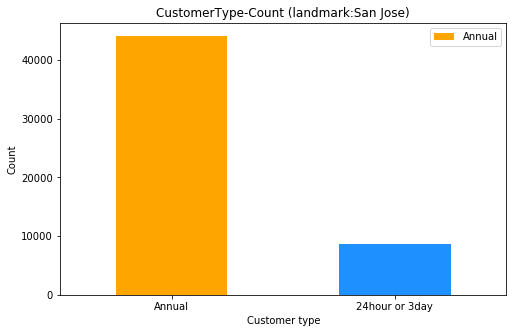

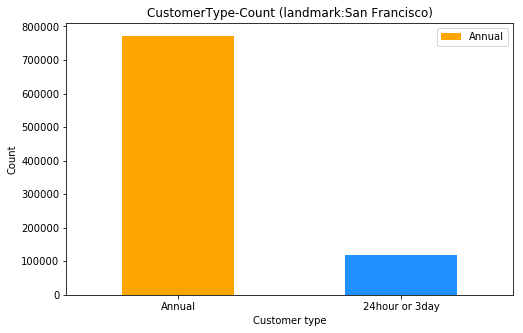

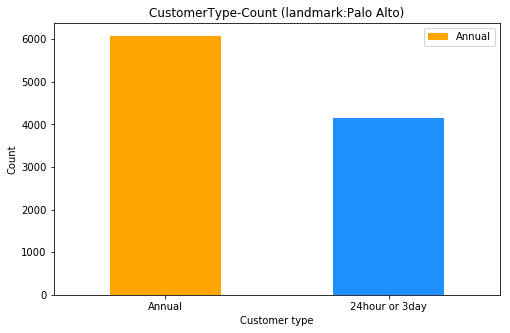

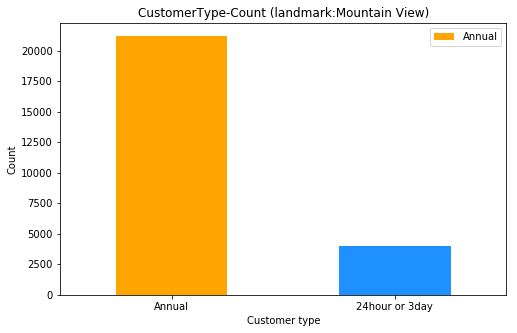

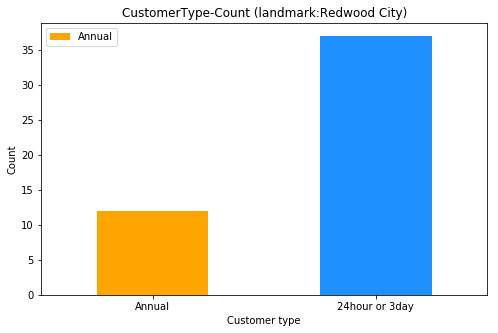

In [2]:
# 分析するデータの指定
s_or_l= "l" # s：station, l：landmark, others: all data
search_list = {"s":table.station.station_id.values, "l":table.station.landmark.unique()}[s_or_l]

for element in search_list:
    if s_or_l == "s":
        station_id = element 
        landmark = "" # landmark =""のとき全てのlandmark
    elif s_or_l == "l":
        station_id = 0 # id=0のとき全てのstation
        landmark = element #['', 'San Jose', 'San Francisco', 'Palo Alto', 'Mountain View', 'Redwood City']
    else:
        station_id = 0
        landmark = ""   

    sub_title = "" # グラフのtitleに使用

    if station_id != 0: # station_idの指定がある場合
        ctype_count = table.features[(table.features["Start ID"] == station_id) | (table.features["End ID"] == station_id)].copy()
        sub_title = f"station:{station_id}" 
    elif  landmark != '' and station_id == 0: # landmarkの指定がある場合(station_id != 0のとき無効)
        ctype_count = table.features[(table.features["Start Landmark"] == landmark) | (table.features["End Landmark"] == landmark)].copy()
        sub_title = f"landmark:{landmark}" 
    else:
        ctype_count = table.features.copy()
        sub_title = "All data" 

    ctype_count = ctype_count.groupby("CType").size()
    ctype_count.plot(kind="bar",  figsize=(8, 5), title=f"CustomerType-Count ({sub_title})", color=[["orange", "dodgerblue"]])
    plt.legend(["Annual","24hour or 3day"])
    plt.ylabel("Count")
    plt.xlabel("Customer type")
    plt.xticks([0 ,1], ["Annual","24hour or 3day"], rotation=0)
    plt.show()

##  会員プランごとの1日あたりの利用回数の推移

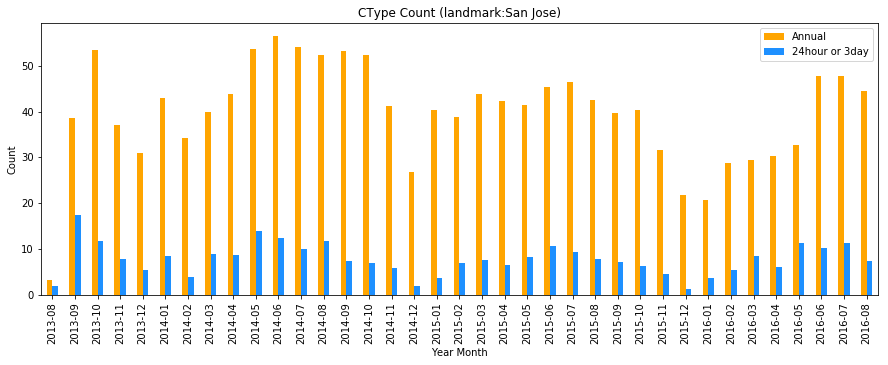

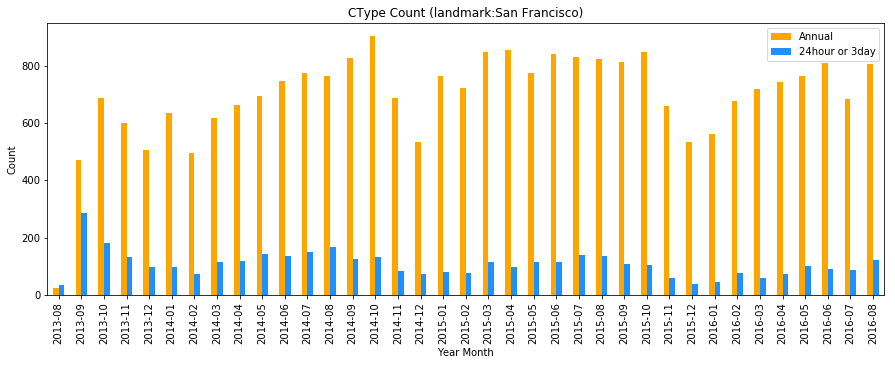

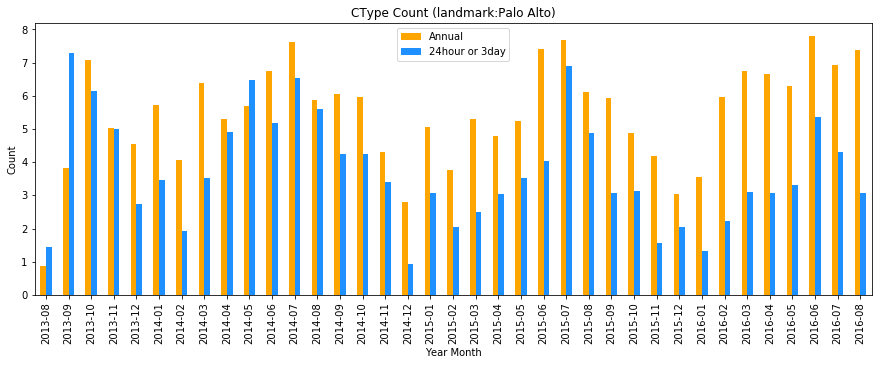

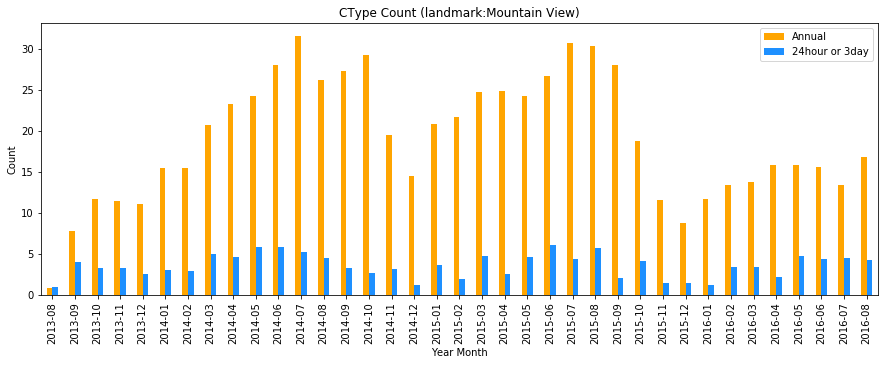

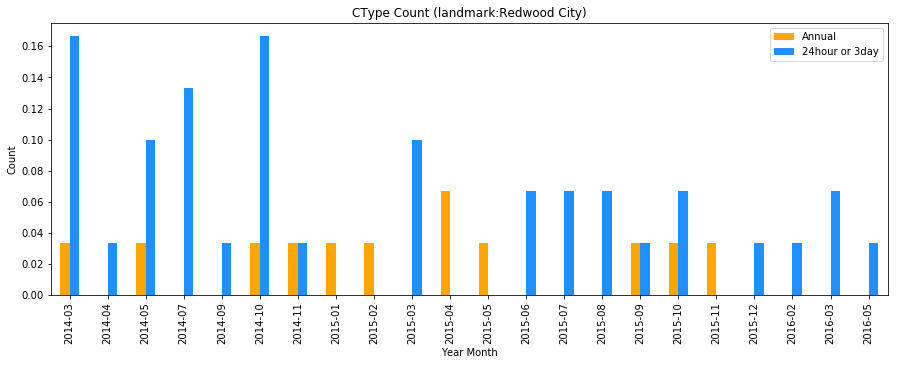

In [3]:
# 分析するデータの指定
s_or_l= "l" # s：station, l：landmark, others: all data
search_list = {"s":table.station.station_id.values, "l":table.station.landmark.unique()}[s_or_l]

for element in search_list:
    if s_or_l == "s":
        station_id = element 
        landmark = "" # landmark =""のとき全てのlandmark
    elif s_or_l == "l":
        station_id = 0 # id=0のとき全てのstation
        landmark = element #['', 'San Jose', 'San Francisco', 'Palo Alto', 'Mountain View', 'Redwood City']
    else:
        station_id = 0
        landmark = ""   
        
    sub_title = "" # グラフのtitleに使用

    if station_id != 0: # station_idの指定がある場合
        ctype_count = table.features[(table.features["Start ID"] == station_id) | (table.features["End ID"] == station_id)].copy()
        sub_title = f"station:{station_id}" 
    elif  landmark != '' and station_id == 0: # landmarkの指定がある場合(station_id != 0のとき無効)
        ctype_count = table.features[(table.features["Start Landmark"] == landmark) | (table.features["End Landmark"] == landmark)].copy()
        sub_title = f"landmark:{landmark}" 
    else:
        ctype_count = table.features.copy()
        sub_title = "All data" 

    ctype_count = ctype_count.groupby(["Year Month", "CType"]).size().to_frame("Count") / 30 # 1日あたり
    ctype_count.reset_index(level=[0,1], inplace=True)
    ctype_count = ctype_count.pivot(index = "Year Month", columns="CType", values="Count")
    ctype_count.fillna(value=0, inplace=True)
    ctype_count.plot(kind="bar", figsize=(15, 5), title=f"CType Count ({sub_title})", color=["orange", "dodgerblue"])
    plt.legend(["Annual","24hour or 3day"])
    plt.ylabel("Count")

## landmarkごとのannual ratio

In [4]:
landmarks = table.station.landmark.unique()
ctype= table.features[["Start Landmark", "End Landmark", "CType"]]
ctypes = []
for landmark in landmarks:
    ctype_sub = pd.DataFrame(ctype.loc[(ctype["Start Landmark"] == landmark) | (ctype["End Landmark"] == landmark), "CType"])
    annual_ratio = ctype_sub.groupby("CType").size()[0] / len(ctype_sub)
    ctypes.append([landmark, annual_ratio, len(ctype_sub)])
    
    
ctype = pd.DataFrame(ctypes).set_index(0)
ctype = ctype.rename(columns = {1:"Annual ratio", 2:"Trip count"})
ctype.index.names = ['Landmark']

ctype = ctype.sort_values("Annual ratio", ascending=False)
ctype.append(pd.DataFrame({"Annual ratio": table.features.CType.mean(), "Trip count":ctype["Trip count"].sum()}, index = ["Total"]))
ctype.head()

,Annual ratio,Trip count
Landmark,,
San Francisco,0.865878,891084
Mountain View,0.842061,25187
San Jose,0.835441,52820
Palo Alto,0.593903,10234
Redwood City,0.244898,49


## Ctypeの割合の推移

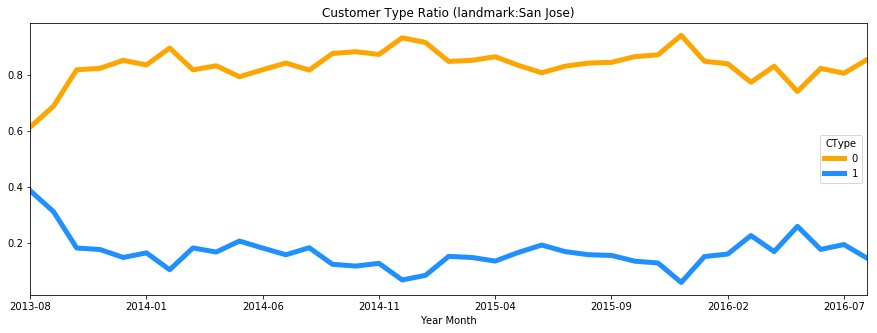

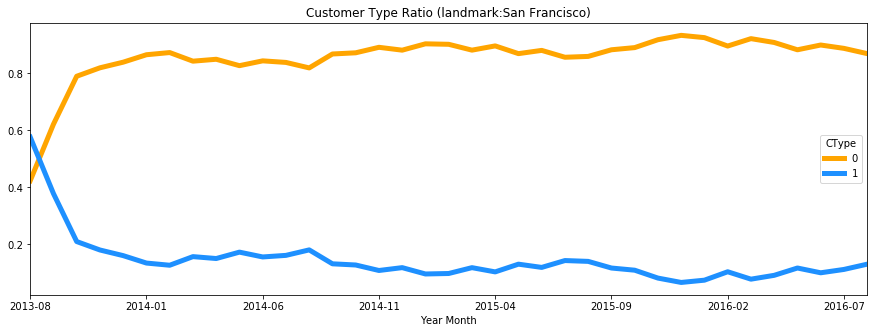

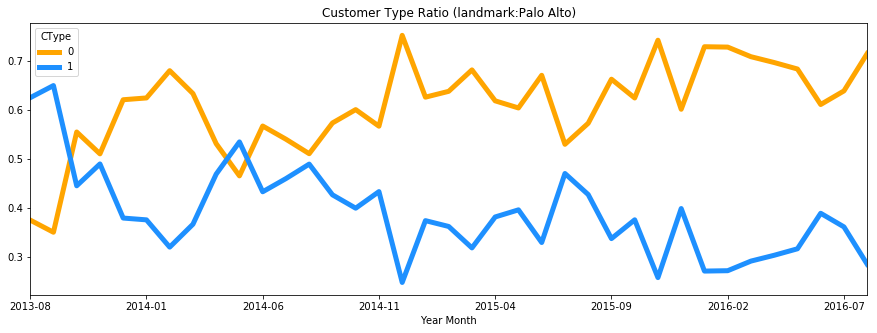

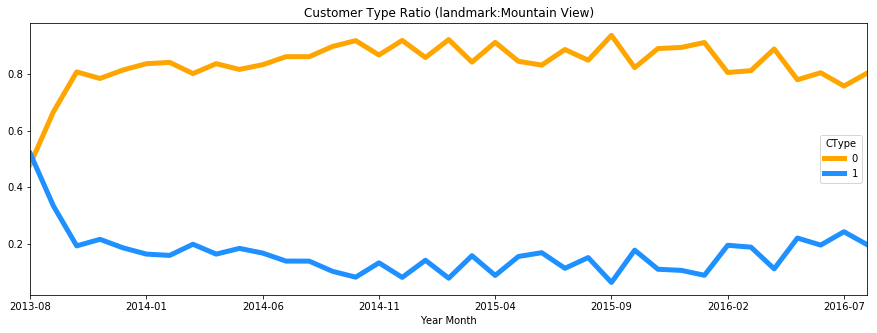

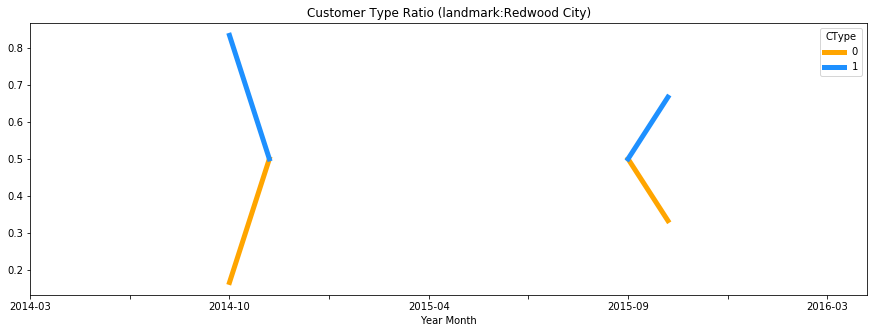

In [5]:
# 分析するデータの指定
s_or_l= "l" # s：station, l：landmark, others: all data
search_list = {"s":table.station.station_id.values, "l":table.station.landmark.unique()}[s_or_l]

for element in search_list:
    if s_or_l == "s":
        station_id = element 
        landmark = "" # landmark =""のとき全てのlandmark
    elif s_or_l == "l":
        station_id = 0 # id=0のとき全てのstation
        landmark = element #['', 'San Jose', 'San Francisco', 'Palo Alto', 'Mountain View', 'Redwood City']
    else:
        station_id = 0
        landmark = ""   
        
    sub_title = "" # グラフのtitleに使用

    if station_id != 0: # station_idの指定がある場合
        ctype_rate = table.features[table.features["Start ID"] == station_id].copy()
        sub_title = f"station:{station_id}" 
    elif  landmark != '' and station_id == 0: # landmarkの指定がある場合(station_id != 0のとき無効)
        ctype_rate = table.features[table.features["Start Landmark"] == landmark].copy()
        sub_title = f"landmark:{landmark}" 
    else:
        ctype_rate = table.features.copy()
        sub_title = "All data" 

    ctype_rate = ctype_rate.groupby(["Year Month","CType"]).size().to_frame("Count")
    ctype_rate = ctype_rate.fillna(value=0)
    ctype_rate.reset_index(level=[0, 1], inplace=True)
    ctype_rate = ctype_rate.pivot(index = "Year Month", columns="CType", values="Count")
    ctype_rate["Total"] = ctype_rate[0] +ctype_rate[1]
    ctype_rate[0] = ctype_rate[0] / ctype_rate["Total"]
    ctype_rate[1] = ctype_rate[1] / ctype_rate["Total"]
    ctype_rate.drop("Total", axis=1, inplace=True)
    ctype_rate.plot(figsize=(15, 5),  title=f"Customer Type Ratio ({sub_title})", color=["orange", "dodgerblue"], linewidth=5)
    plt.show()